# Rapidez de expasión del fondo marino

Estudiante: Pablo González A. - 20973277-7

Corramos estas librarías que serán útiles para esta tarea:

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs

Ahora veremos la relación entre la edad del lecho marino (Ma) y la distancia desde la dorsal (km) para determinar la velocidad de propagación entre las placas oceánicas (km / Ma).  Un Ma (mega-annum) equivale a un millón de años. 

## Dorsal mesoatlántica
Los datos con los que trabajará para esta tarea provienen de las inversiones geomagnéticas y sus respectivas edades que exploramos en el jupyter notebook de la clase pasada.

In [5]:
# data from the Mid-Atlantic Ridge
atlantic_data=pd.read_csv('MAR_east_age_dist.csv')
atlantic_data.head(600)

,Unnamed: 0,Age,Lon,Lat,Distance
0,1,9.31,-44.90,24.16,153.99
1,4,9.31,-44.60,24.35,185.35
2,6,9.31,-44.43,24.46,190.08
3,10,9.31,-44.31,24.77,166.80
4,11,9.31,-44.29,24.87,152.27
...,...,...,...,...,...
230,496,83.00,-30.68,28.20,1456.84
231,498,83.00,-30.25,28.48,1480.63
232,499,83.00,-30.23,28.55,1475.70
233,502,83.00,-29.83,28.75,1513.58


Mostremos la ubicación de esas distintas edades en un mapa.

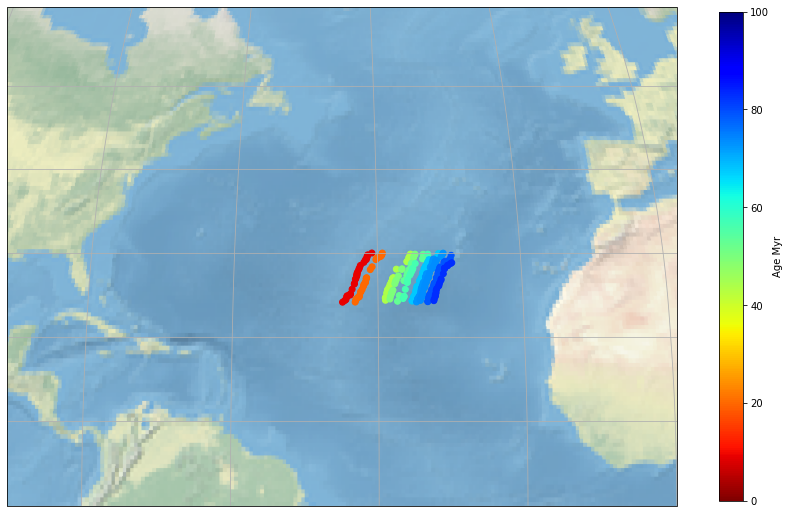

In [6]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(-46.0))
ax.set_extent([-90.0, 0.0, 0.0, 60.0], crs=ccrs.PlateCarree())

plt.scatter(atlantic_data['Lon'],atlantic_data['Lat'],marker='o',c=atlantic_data['Age'],
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Age Myr')

# ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Plotee la distancia desde la dorsal en función de la edad del lecho marino. Incluya las etiquetas de los ejes y el título.

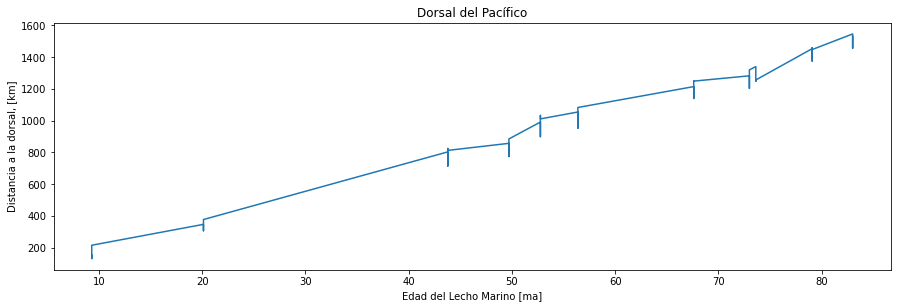

In [7]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(atlantic_data['Age'], atlantic_data["Distance"]); # plot the pacific marine magnetic anomaly
ax1.set_xlabel('Edad del Lecho Marino [ma]');
ax1.set_ylabel('Distancia a la dorsal, [km]');
ax1.set_title('Dorsal del Atlántico');

plt.show()

Ahora calculará la velocidad a la que se mueve la placa tectónica. Para ello debe encontrar la pendiente de una línea que atraviesa la gráfica de distancia desde la dorsal versus la edad del fondo marino. Para ajustar esta recta es necesario seleccionar dos puntos de los datos. Como probablemente ya saben, la ecuación  de una recta es $y = mx + b$ donde $ m $ es la pendiente y $ b $ es la intersección en y. La pendiente puede ser calculada como $ m  = \frac{y_ {1} -y_ {0}} {x_ {1} -x_ {0}} $ y luego con esa pendiente y resuelve para la intersección con en eje y como $b = y_ {1} -mx_ {1}$. Por ejemplo:

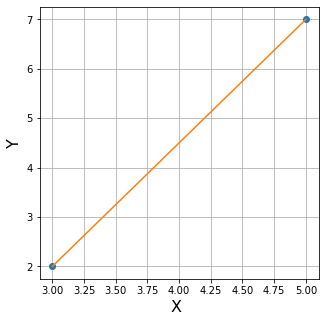

In [8]:
x = np.asarray([3.0, 5.0]);
y = np.asarray([2.0, 7.0]);

m = (y[1]-y[0])/(x[1]-x[0]);  # use the two points to find the slope rise/run, dy/dx
b = y[1]-m*x[1]  # solve for the y-intercept

plt.figure(1,(5,5)) 
plt.plot(x,y,'o')
plt.plot(x,m*x+b,'-')
plt.xlabel('X ', fontsize=16);
plt.ylabel('Y', fontsize=16);
plt.grid()

Defina una función que tome las coordenadas (x,y) de dos puntos de los datos y que devuelva la pendiente y la intersección con el eje y.

In [20]:
def mx_b(x0,y0,x1,y1):
    """
    Function to compute the slope and intercept of a line
    
    input parameters
    ----------
    x0,y0: first coordinate pair
    x1,y1: second coordinate pair
    
    output
    ------
    m : slope of line that connects (x0,y0) and (x1,y1)
    b : slope of line that connects (x0,y0) and (x1,y1)
    """
    m = (y0-y1)/(x0-x1)
    b= -m*x0+y0


    return m,b

Usa tu función para aproximar una recta que atraviesa la gráfica de distancia versus edad para el Atlántico. Debe elegir dos coordenadas x, y que se encuentran dentro de los datos y calcular la línea que las conecta. Tiene libertad para escoger los puntos, intente seleccionar buen par de puntos que aproximen de mejor forma los datos.

In [21]:
# determine valor de la m y b de los datos en esta celda.
# Escogiendo los puntos 0: (9.31,153.99); y 230: (83,1456.84)

m,b = mx_b(9.31,153.99,83,1456.84)
print(m,b)

17.680146559913148 -10.612164472791392


Plotee esta recta sobre la gráfica distancia desde la dorsal atlántica vs edad.

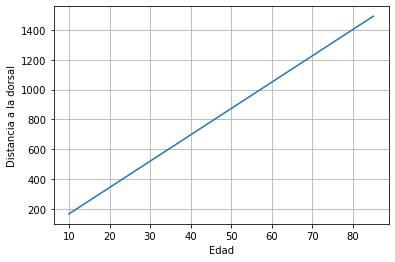

In [23]:
x = np.asarray([10, 85]);

plt.plot(x,m*x+b,'-')
plt.xlabel("Edad [ma]");
plt.ylabel("Distancia a la dorsal [km]");
plt.title("Distancia a la dorsal atlántica vs edad.")
plt.grid()

¿Cuál es la velocidad de expansión de la dorsal del Atlántico?.

La velocidad de expansión de la dorsal atrlantica será aproximadamente la pendiente del gráfico de regresion realizada. En este caso, es aproximadamente 17.68 [km]/[ma]

## Dorsal del Pacífico Oriental
Hagamos el mismo proceso anterior pero ahora para la dorsal de Pacífico.

In [25]:
# data from the Pacific Antarctic Ridge
pacific_data=pd.read_csv('PAR_east_age_dist.csv')
pacific_data.head()

,Unnamed: 0,Age,Lon,Lat,Distance
0,3,0.780,-137.2106,-54.9759,57.5867
1,4,0.780,-137.1864,-54.9379,53.0835
2,5,0.780,-137.1575,-54.9122,57.7443
3,141,1.860,-136.5462,-55.1561,149.5914
4,142,1.860,-136.5178,-55.1163,148.0458
...,...,...,...,...,...
135,273,40.130,-118.4142,-59.2441,2564.9686
136,274,40.130,-118.3182,-58.9366,2539.8152
137,275,40.130,-118.2649,-58.8816,2539.1859
138,276,40.130,-118.2043,-58.8312,2539.8638


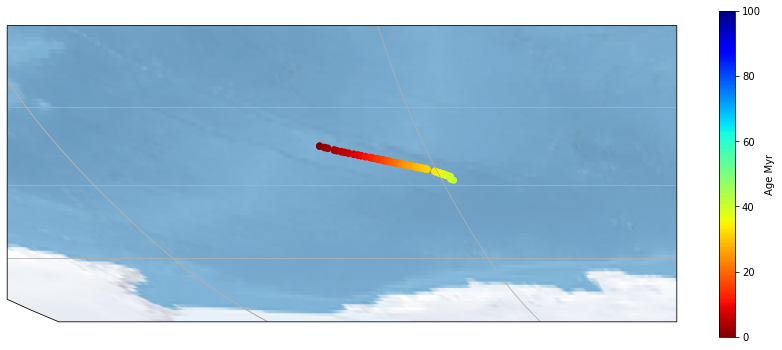

In [13]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(-46.0))
ax.set_extent([-175.0, -90.0, -40.0, -80.0], crs=ccrs.PlateCarree())

plt.scatter(pacific_data['Lon'],pacific_data['Lat'],marker='o',c=pacific_data['Age'],
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.4,label='Age Myr')

# ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Plotee la distancia desde la dorsal en función de la edad del lecho marino para la placa del Antartica. Incluya etiquetas en los ejes y el título.

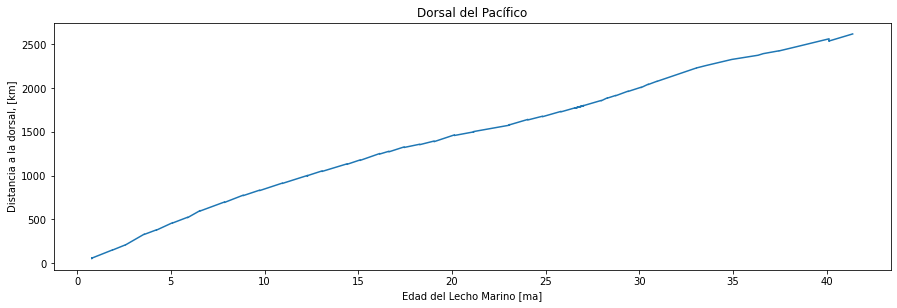

In [24]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(pacific_data['Age'], pacific_data["Distance"]); # plot the pacific marine magnetic anomaly
ax1.set_xlabel('Edad del Lecho Marino [ma]');
ax1.set_ylabel('Distancia a la dorsal, [km]');
ax1.set_title('Dorsal del Pacífico');

plt.show()

Usa tu función para aproximar una recta que atraviesa la gráfica de distancia vs. edad de la placa antártica.

63.715984752223626 8.045531893265569


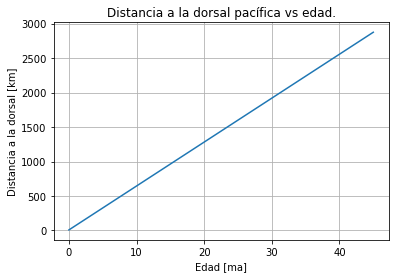

In [26]:
m,b = mx_b(0.780,57.744,40.130,2564.968)
print(m,b)

x = np.asarray([0, 45]);

plt.plot(x,m*x+b,'-')
plt.xlabel("Edad [ma]");
plt.ylabel("Distancia a la dorsal [km]");
plt.title("Distancia a la dorsal pacífica vs edad.")
plt.grid()

Agregue esta recta a su gráfico de distancia vs. edad de la placa antártica.

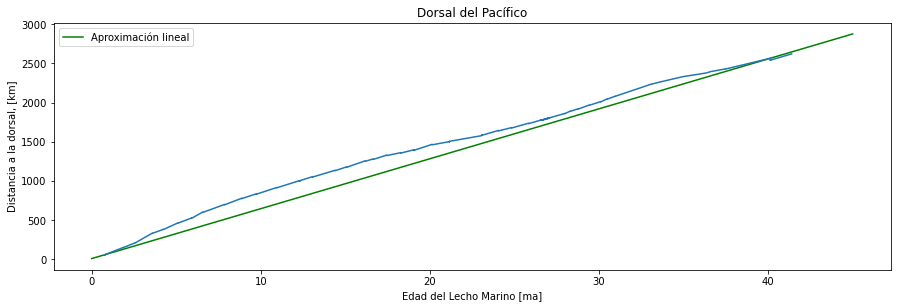

In [34]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)


ax1.plot(x,m*x+b,'-g')
ax1.legend(["Aproximación lineal"])

ax1.plot(pacific_data['Age'], pacific_data["Distance"]); # plot the pacific marine magnetic anomaly




ax1.set_xlabel('Edad del Lecho Marino [ma]');
ax1.set_ylabel('Distancia a la dorsal, [km]');
ax1.set_title('Dorsal del Pacífico');

plt.show()

¿Cuál es la velocidad de propagación de la placa que se aleja de la dorsal Pacífico-Antártica?

Realizando un análisis analogo al de la dorsal atlántica, se evidencia que la velocidad estimada de propagación de la placa que se aleja de la dorsal pacífica es de 63.7 [km]/[ma]

¿Es la pendiente de la placa antártica más o menos pronunciada que la del Atlántico oriental?. Haga una figura con ambos datos y sus respectivas aproximaciones lineales. ¿Qué dorsal se está extendiendo más rápido?

La pendiente de la placa antartica es considerablemente más pronunciada que la del Atlántico oriental. Lo anterior nos indica que la dorsal de la placa antártica se extiende más rapido en comparacion a las masas de tierra desplazadas en la dorsal atlántica.

Estas tasas de propagación que has calculado son lo que llamamos la mitad de la tasa de propagación. La tasa de propagación completa es la velocidad a la que viajan las dos placas oceánicas entre sí y es aproximadamente el doble de la tasa de propagación que se ha calculado durante esta tarea.

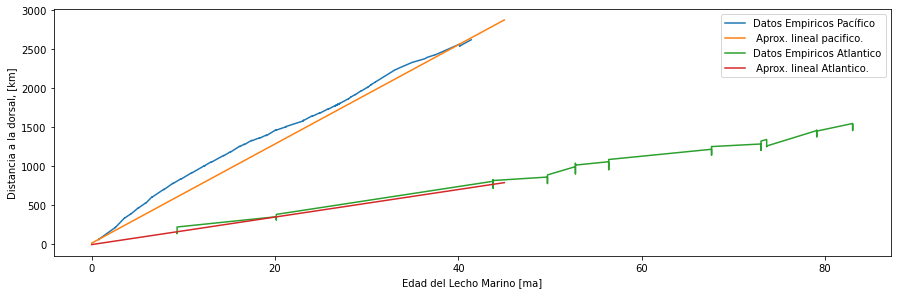

In [39]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)

mp,bp = mx_b(0.780,57.744,40.130,2564.968)
ma,ba = mx_b(9.31,153.99,83,1456.84)

x = np.asarray([0, 45])




ax1.plot(pacific_data['Age'], pacific_data["Distance"], label="Datos Empiricos Pacífico"); 
ax1.plot(x,mp*x+bp, label=" Aprox. lineal pacifico.")


ax1.plot(atlantic_data['Age'], atlantic_data["Distance"], label="Datos Empiricos Atlantico"); # plot the pacific marine magnetic anomaly
ax1.plot(x,ma*x+ba, label=" Aprox. lineal Atlantico.")

ax1.set_xlabel('Edad del Lecho Marino [ma]');
ax1.set_ylabel('Distancia a la dorsal, [km]');

ax1.legend()

plt.show()